In [4]:
import pyspedas, pytplot, load
import numpy as np
trange = ['1990-02-11', '1990-02-12']
load.mca(trange)
tplot_names = ['Emax', 'Eave', 'Bmax', 'Bave']
for i in range(4):
    tplot_variable = pytplot.get_data(tplot_names[i])
    tplot_variable_float = (tplot_variable.y).astype(float)
    np.place(tplot_variable_float, tplot_variable_float == 254, np.nan)
    tplot_variable_0dB = 1e-6 #mV or pT
    bandwidth = tplot_variable.v * 0.3
    tplot_variable_amplitude = (10**(tplot_variable_float/20)) * (tplot_variable_0dB)  / np.sqrt(bandwidth)
    tplot_variable_amplitude2 = (10**(tplot_variable_float/20)) * (tplot_variable_0dB) 
    #tplot_variable_power = (10**(tplot_variable_float/10)) * ((tplot_variable_0dB)**2)  / bandwidth
    pytplot.store_data(tplot_names[i] +'_Amp', data={'x': tplot_variable.times, 'y': tplot_variable_amplitude, 'v': tplot_variable.v})
    pytplot.store_data(tplot_names[i] +'_Amp2', data={'x': tplot_variable.times, 'y': tplot_variable_amplitude2, 'v': tplot_variable.v})
    #pytplot.store_data(tplot_names[i] +'_Pwr', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})
Emax = pytplot.get_data('Emax_Amp')
Emax2 = pytplot.get_data('Emax_Amp2')
#Bmax = pytplot.get_data('Bmax_Amp')

time = Emax.times
slice_time = pyspedas.time_double('1990-02-11 18:05:30')
for i in range(time.size):
    if time[i] < slice_time:
        pass
    else:
        slice_time_index = i
        slice_time = time[i]
        break
Emax_slice = Emax.y[slice_time_index]
freq_range = Emax.v



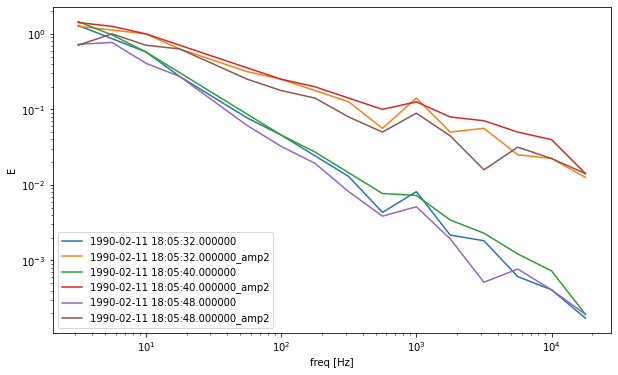

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
for i in range(3):
    plt.plot(freq_range, Emax.y[slice_time_index + i], label = pyspedas.time_string(time[slice_time_index + i]))
    plt.plot(freq_range, Emax2.y[slice_time_index + i], label = pyspedas.time_string(time[slice_time_index + i])+'_amp2')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('freq [Hz]')
plt.ylabel('E')

plt.legend()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
for i in range(2):
    plt.plot(freq_range, Emax.y[slice_time_index + i]/Bmax.y[slice_time_index + i] *1e9, label = pyspedas.time_string(time[slice_time_index + i]))
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e4, 1e10)
plt.xlabel('freq [Hz]')
plt.ylabel('E/B')

plt.legend()
plt.savefig("output2.jpg")

In [2]:
import pyspedas 


In [6]:
a = pyspedas.time_double('2014-01-01')
b = pyspedas.time_double('2014-01-02')
b-a

86400.0

In [8]:
from pyspedas.utilities.dailynames import dailynames
trange = ['2021-01-01', '2021-01-03']
file_names = dailynames(file_format='/ED%y%m%d.txt', trange=trange)
file_names

['/ED210101.txt', '/ED210102.txt']

In [11]:
import pyspedas
import pytplot
from pytplot import options
from pytplot import tplot
from pytplot import tlimit
from pytplot import tplot_options
import Akebono_mca_load
import Akebono_orb_load
import numpy as np

date = '19910611'
importer2 = Akebono_orb_load.Akebono_orb_load(date)
importer2.orb()